In [1]:
import matplotlib.pyplot as plt 

In [25]:
import pandas as pd
import glob
import multiprocessing as mp

def read_mass_freq_file(filepath):
    df = pd.read_csv(filepath, delim_whitespace=True, header=None, names=["mass_solar","radius km", "freq_khz"])
    df["source_file"] = filepath  # Add filename as identifier (optional)
    return df

# Collect all filenames
file_list_hot= glob.glob("/Users/smag0001/Downloads/f_peak_S_2_new/*.out")  # or adjust as needed
file_list = glob.glob("/Users/smag0001/Downloads/f_peak_T_0_new/*.out")
#print(file_list)

dfs = [read_mass_freq_file(f) for f in file_list]
dfs_hot = [read_mass_freq_file(f) for f in file_list_hot]
all_data = pd.concat(dfs, ignore_index=True)
all_data_hot = pd.concat(dfs_hot,ignore_index=True)
print(all_data)

       mass_solar  radius km  freq_khz  \
0        2.200000  16.716112  3.318129   
1        2.210000  16.702856  3.328729   
2        2.220000  16.689314  3.339416   
3        2.230000  16.675623  3.350153   
4        2.240000  16.661696  3.360966   
...           ...        ...       ...   
97952    2.900000  15.670855  4.128786   
97953    2.910000  15.598207  4.162577   
97954    2.920000  15.509372  4.202935   
97955    2.930000  15.387869  4.256584   
97956    2.939383  15.087150  4.383327   

                                             source_file  
0      /Users/smag0001/Downloads/f_peak_T_0_new/f_pea...  
1      /Users/smag0001/Downloads/f_peak_T_0_new/f_pea...  
2      /Users/smag0001/Downloads/f_peak_T_0_new/f_pea...  
3      /Users/smag0001/Downloads/f_peak_T_0_new/f_pea...  
4      /Users/smag0001/Downloads/f_peak_T_0_new/f_pea...  
...                                                  ...  
97952  /Users/smag0001/Downloads/f_peak_T_0_new/f_pea...  
97953  /Users/smag0001/

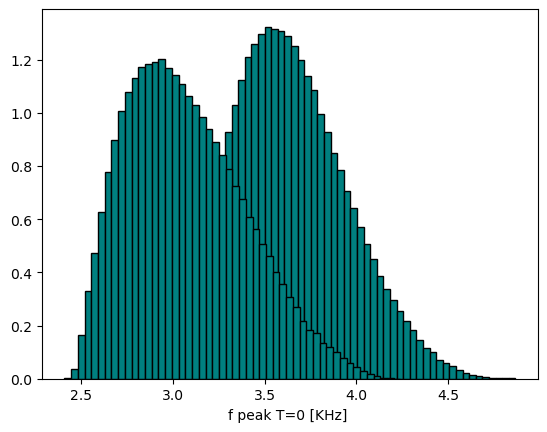

In [26]:
plt.hist(all_data["freq_khz"],density=True,bins=50,edgecolor='black',color='teal')
plt.hist(all_data_hot["freq_khz"],density=True,bins=50,edgecolor='black',color='teal')
plt.xlabel("f peak T=0 [KHz] ")
plt.grid(False)
plt.savefig("peak_freq.png") 

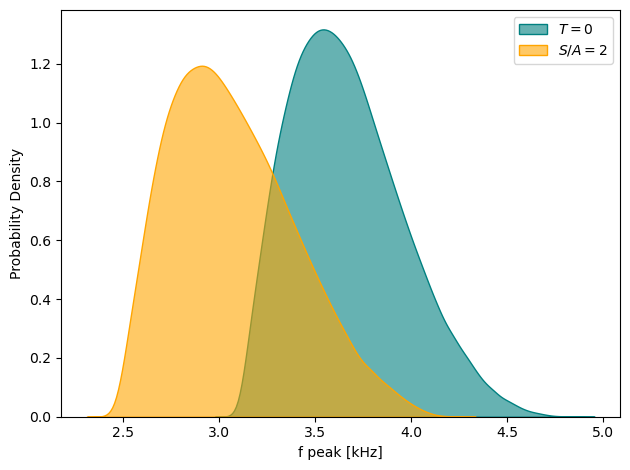

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot smooth PDFs
sns.kdeplot(data=all_data, x="freq_khz", fill=True, color="teal", alpha=0.6, label=r'$T=0$')
sns.kdeplot(data=all_data_hot, x="freq_khz", fill=True, color="orange", alpha=0.6, label=r'$S/A=2$')

# Label and style
plt.xlabel("f peak [kHz]")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig("peak_freq.png")
#plt.close()

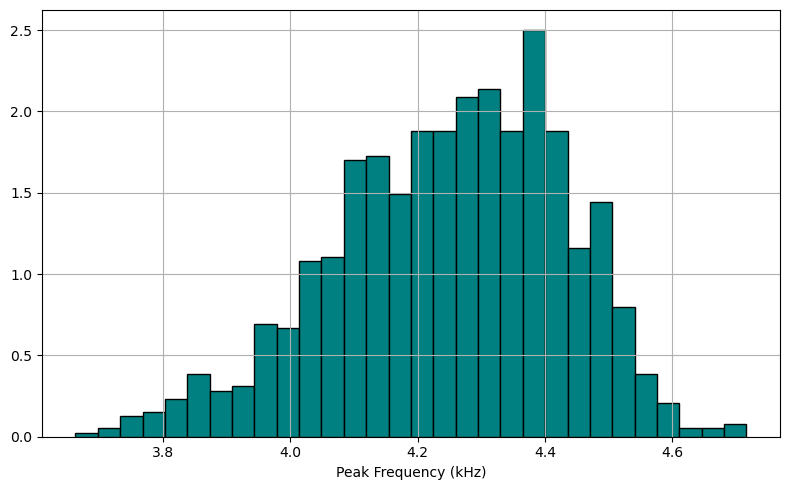

In [27]:
# Define the mass range
mass_min = 2.73
mass_max = 2.78

# Filter data in mass range
filtered = all_data[(all_data["mass_solar"] >= mass_min) & (all_data["mass_solar"] <= mass_max)]

# Get peak frequency for each file (just the values, no metadata)
peak_freqs = (
    filtered.groupby("source_file")["freq_khz"]
    .max()
    .reset_index(drop=True)
)

# Plot histogram of peak frequencies
plt.figure(figsize=(8, 5))
plt.hist(peak_freqs, bins=30, edgecolor="black",density=True,color='teal')
plt.xlabel("Peak Frequency (kHz)")

plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'peak freq')

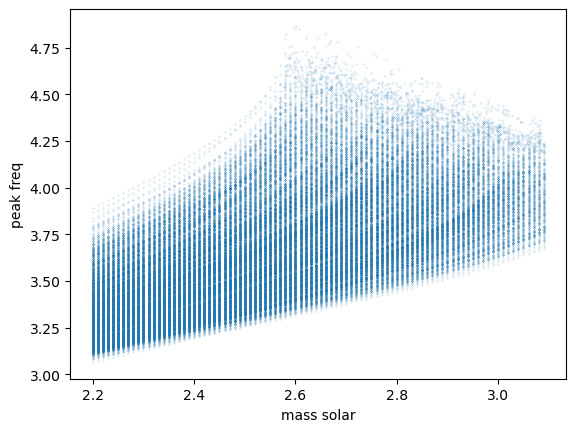

In [28]:
plt.scatter(all_data['mass_solar'],all_data["freq_khz"],s=0.01)
plt.xlabel("mass solar")
plt.ylabel("peak freq")